In [32]:
# import numpy as np
# import pandas as pd
# from scipy import stats
# import statsmodels.api as sm
# import statsmodels
# import matplotlib.pyplot as plt
# from UE_04_LinearRegDiagnostic import LinearRegDiagnostic
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit

In [16]:
path = "C:/Users/david/E-15/Programmieren/MotorcycleClassification/"

In [17]:
df_train = pd.read_csv(path+"data/train/training_data.csv")
df_test = pd.read_csv(path+"data/validation/test_data.csv")

In [18]:
# # Import data
# y_cols = [
#     "Category_ATV",
#     "Category_Allround",
#     "Category_Classic",
#     "Category_Cross / motocross",
#     "Category_Custom / cruiser",
#     "Category_Enduro / offroad",
#     "Category_Naked bike",
#     "Category_Scooter",
#     "Category_Sport",
#     "Category_Sport touring",
#     "Category_Super motard",
#     "Category_Touring",
#     "Category_Unspecified category"
# ]

# # y: Labels
# y_train_raw = df_train[y_cols]
# y_test_raw = df_test[y_cols]
# # X: Features (alles außer Kategorien)
# X_train = df_train.drop(columns=y_cols)
# X_test = df_test.drop(columns=y_cols)


In [19]:
y = 'Category'

In [20]:
X_train = df_train.drop(y,axis=1)
y_train = df_train[y]
X_test = df_test.drop(y,axis=1)
y_test = df_test[y]


# Shape verifizieren
print(f"Dataset Shape: {X_train.shape}")
print(f"Dataset Shape: {y_train.shape}")
print(f"Dataset Shape: {X_test.shape}")
print(f"Dataset Shape: {y_test.shape}")

Dataset Shape: (13912, 23)
Dataset Shape: (13912,)
Dataset Shape: (3478, 23)
Dataset Shape: (3478,)


In [21]:
''' Folgender Code obsolet bei singele Category'''

# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.discrete.discrete_model import MNLogit
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix



# # 1. LabelEncoder erstellen und auf TRAIN-Daten fitten
# le = LabelEncoder()

# # y_train: One-Hot -> Single Column -> Encoded
# y_train_single = y_train_raw.idxmax(axis=1)
# y_train_single = y_train_single.str.replace('Category_', '')
# y_train = le.fit_transform(y_train_single)

# # y_test: One-Hot -> Single Column -> Encoded (mit dem GLEICHEN Encoder!)
# y_test_single = y_test_raw.idxmax(axis=1)
# y_test_single = y_test_single.str.replace('Category_', '')
# y_test = le.transform(y_test_single)

# print("Klassen-Mapping:")
# for i, category in enumerate(le.classes_):
#     print(f"{i}: {category}")


' Folgender Code obsolet bei singele Category'

In [22]:

from sklearn.preprocessing import LabelEncoder
# 1. LabelEncoder erstellen und auf TRAIN-Daten fitten

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) 

print("Klassen-Mapping:")
for i, category in enumerate(le.classes_):
    print(f"{i}: {category}")

Klassen-Mapping:
0: ATV
1: Allround
2: Classic
3: Cross / motocross
4: Custom / cruiser
5: Enduro / offroad
6: Naked bike
7: Scooter
8: Sport
9: Sport touring
10: Super motard
11: Touring
12: Unspecified category


In [23]:
X_train.describe()



,"Engine type_In-line four, four-stroke","Engine type_In-line three, four-stroke","Engine type_Single cylinder, four-stroke","Engine type_Single cylinder, two-stroke","Engine type_Twin, four-stroke","Engine type_Twin, two-stroke","Engine type_Two cylinder boxer, four-stroke","Engine type_V2, four-stroke","Engine type_V4, four-stroke","Transmission type,final drive_Belt",...,Front brakes_Dual disc,Front brakes_Expanding brake,Front brakes_Expanding brake (drum brake),Front brakes_Single disc,Rear brakes_Expanding brake,Rear brakes_Expanding brake (drum brake),Rear brakes_Single disc,Displacement ccm,Fuel capacity liters,Power HP
count,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,...,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000
mean,0.105017,0.035581,0.368746,0.092869,0.114002,0.018689,0.035293,0.214707,0.015095,0.203206,...,0.124281,0.055420,0.092582,0.480449,0.141748,0.227430,0.630822,0.001748,0.003836,0.003485
std,0.306587,0.185249,0.482482,0.290260,0.317825,0.135429,0.184527,0.410633,0.121935,0.402399,...,0.329914,0.228806,0.289856,0.499636,0.348804,0.419187,0.482599,1.000286,1.002454,1.002374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.257002,-2.544231,-1.154505
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.948802,-0.723527,-0.827445
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.151526,0.043085,-0.325006
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.653448,0.713871,0.646693
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.263727,2.632318,3.182590


In [24]:
numeric_values = ['Displacement ccm', 'Fuel capacity liters', 'Power HP']

In [25]:
# # 2. Konstante zu Features hinzufügen
# X_train_const = sm.add_constant(X_train)
# X_test_const = sm.add_constant(X_test)

In [30]:
# 3. Modell auf Trainingsdaten fitten
print("Training Multinomial Logit Model...")
mnlogit_model = MNLogit(y_train, X_train[numeric_values])
fit_model = mnlogit_model.fit(method='bfgs')  # statt 'bfgs'

print(fit_model.summary())

Training Multinomial Logit Model...


c:\Users\david\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\david\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 2.067030
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                13912
Model:                        MNLogit   Df Residuals:                    13876
Method:                           MLE   Df Model:                           24
Date:                Sat, 17 Jan 2026   Pseudo R-squ.:                  0.1317
Time:                        13:54:07   Log-Likelihood:                -28757.
converged:                      False   LL-Null:                       -33117.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Displacement ccm        -0.1189      0.149     -0.800   


EVALUATION ON TEST DATA

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.14      0.00      0.01       341
           2       0.24      0.10      0.14       294
           3       0.00      0.00      0.00        43
           4       0.39      0.52      0.44       309
           5       0.00      0.00      0.00       287
           6       0.37      0.24      0.30       410
           7       0.37      0.91      0.53       525
           8       0.35      0.47      0.40       553
           9       0.26      0.32      0.29       225
          10       0.06      0.01      0.01       142
          11       0.14      0.27      0.18       169
          12       0.00      0.00      0.00       129

    accuracy                           0.33      3478
   macro avg       0.18      0.22      0.18      3478
weighted avg       0.25      0.33      0.26      3478


Test Accuracy: 0.331


c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


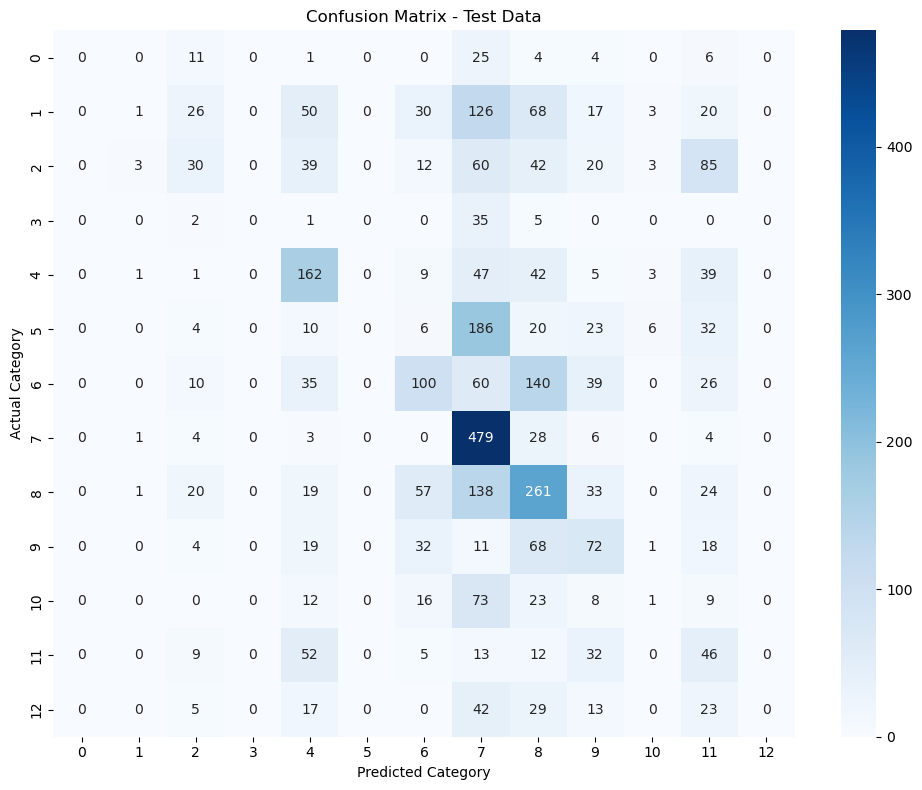


Train Accuracy: 0.332


In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 4. Vorhersagen auf Testdaten
print("\n" + "="*60)
print("EVALUATION ON TEST DATA")
print("="*60 + "\n")

# Wahrscheinlichkeiten vorhersagen
y_pred_proba = fit_model.predict(X_test[numeric_values])

# Klasse mit höchster Wahrscheinlichkeit auswählen
y_pred_test = y_pred_proba.idxmax(axis=1)  # oder: np.argmax(y_pred_proba, axis=1)

# 5. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# 6. Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Accuracy: {accuracy:.3f}")

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix - Test Data')
plt.tight_layout()
plt.show()

# 8. Train Accuracy
y_pred_train_proba = fit_model.predict(X_train[numeric_values])
y_pred_train = y_pred_train_proba.idxmax(axis=1)
print(f"\nTrain Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")